/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


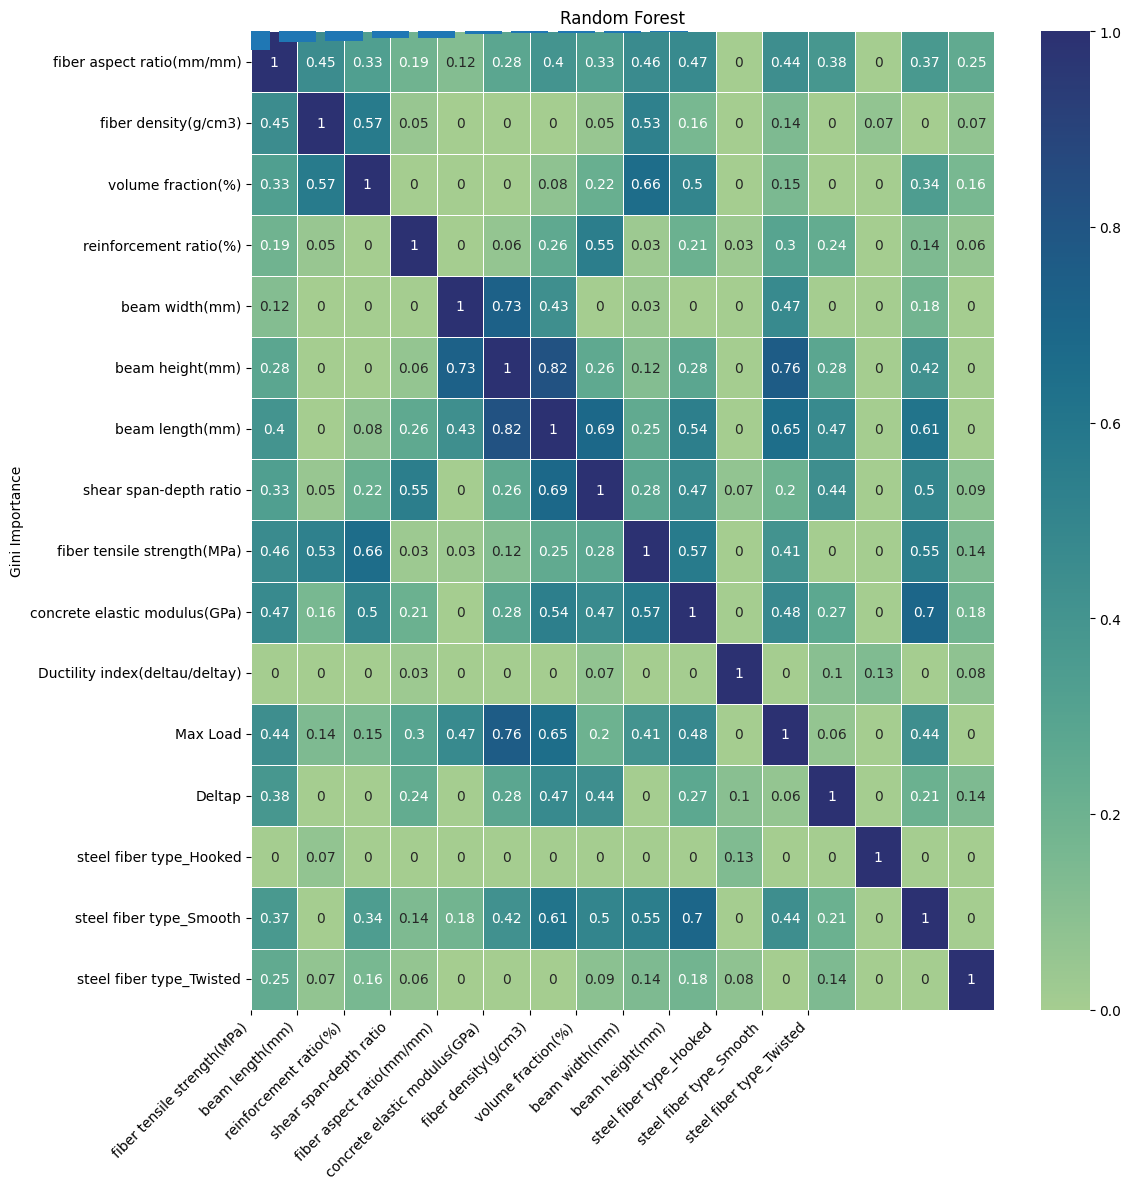

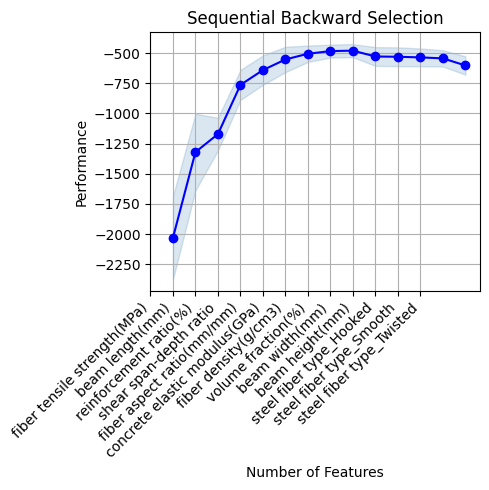

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
DataSet = pd.read_excel( '/content/Dataset.xlsx').drop(columns=['name','DOI', 'content (%)' ]).dropna()
# Making one hot encoding of a column
data = pd.get_dummies(data=DataSet, columns=['steel fiber type'])
data.columns
scaler = MinMaxScaler()
scaler.fit(data)
data = pd.DataFrame(scaler.transform(data.values), index=data.index, columns=data.columns)
data = data.drop(columns = ['Ductility index(deltap/deltay)'])
scaler = MinMaxScaler()
scaler.fit(data)
normData = pd.DataFrame(scaler.transform(data.values), index=data.index, columns=data.columns)
cor=normData.corr()
for i in range (len(cor)):
    for j in range (len(cor)):
        if cor.iloc[i,j] < 0.01:
            cor.iloc[i,j] = 0
        else:
            cor.iloc[i,j] = round(cor.iloc[i,j] , 2)
fig, ax1 = plt.subplots(figsize=(12,12))
svm=sns.heatmap(cor,annot=True,ax=ax1, cmap='crest',  linewidth=.5)


#figure = svm.get_figure()
#plt.tight_layout()
#figure.savefig('PearsonCor.pdf', dpi=800)
#cor.to_excel('pearson_correlation.xlsx')
#fig.savefig('PearsonCor.pdf', dpi=800)

fig.savefig('PearsonCor.pdf', dpi=800, bbox_inches='tight')
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
extra = [ 'Ductility index(deltau/deltay)','Max Load']
y1 ='Deltap'
data2 = data.copy().drop(columns = extra)
y=data2[y1]
x=data2.drop(columns=y1)
names=x.columns
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=10)
# Create a random forest regresion
clf = RandomForestRegressor(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(x_train, y_train)
features=[]
# Print the name and gini importance of each feature
for f in zip(names, clf.feature_importances_):
    features.append(f)
features.sort(key=lambda tup: tup[1],reverse=True)

features
#separating feature names and their values
feature_name=[]
feature_value=[]
for i in features:
    feature_name.append(i[0])
    feature_value.append(i[1])
plt.bar(range(len(feature_value)),feature_value)
plt.xticks(range(len(feature_name)),feature_name)
plt.ylabel('Gini Importance')
plt.title('Random Forest')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('randomforest.pdf',dpi = 400)
plt.show()
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
DataSet = pd.read_excel( '/content/Dataset.xlsx').drop(columns=['name','DOI', 'content (%)' ]).dropna()
# Making one hot encoding of a column
data = pd.get_dummies(data=DataSet, columns=['steel fiber type'])

extra = [ 'Deltap','Ductility index(deltau/deltay)']
y1 ='Max Load'
data2 = data.copy().drop(columns = extra)
y=data2[y1]
x=data2.drop(columns=y1)
names=x.columns
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=10)
lr = LinearRegression()

sfs = SFS(lr,
          k_features=1,
          forward=False,
          floating=True,
          scoring='neg_mean_squared_error',
          cv=5)

sfs = sfs.fit(x_train,y_train)

fig = plot_sfs(sfs.get_metric_dict(), kind='std_err',figsize=(5,5))
plt.xticks(range(len(feature_name)),feature_name)
plt.xticks(rotation=45, ha='right')
plt.title('Sequential Backward Selection')
plt.grid()
plt.tight_layout()
#plt.savefig('backward.pdf',dpi = 400)
plt.show()


#fig[0].savefig('SBS.png', dpi=800)

